In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import gc
import PIL
import tensorflow as tf
from tensorflow import keras 


2023-10-27 22:18:27.606910: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import pathlib
main_dir="../Dataset/PlantVillage/"
train_dir=os.path.join(main_dir,'train')
test_dir=os.path.join(main_dir,'test')
valid_dir=os.path.join(main_dir,'validation')

data_dir='../Dataset/PlantVillage/'
#test_dir='Dataset//'
data_dir=pathlib.Path(data_dir)
#test_dir=pathlib.Path(test_dir)
data_dir

PosixPath('../Dataset/PlantVillage')

In [4]:
os.listdir(data_dir)

['validation', 'test', 'train']

In [5]:
disease_dict={
    'potato_early_blight':list(data_dir.glob('0_Potato___early_blight/*')),
    'potato_late_blight':list(data_dir.glob('0_Potato___late_blight/*')),
    'potato_healthy':list(data_dir.glob('0_Potato___healthy/*')),
    
    'tomato_bacterial_spot':list(data_dir.glob('1_Tomato___bacterial spot/*')),
    'tomato_early_blight':list(data_dir.glob('1_Tomato___Early_blight/*')),
    'tomato_late_blight':list(data_dir.glob('1_Tomato___Late_blight/*')),
    'tomato_leaf_mold':list(data_dir.glob('1_Tomato___leaf/*')),
    'tomato_septoria_leaf_spot':list(data_dir.glob('1_Tomato___septoria leaf spot/*')),
    'tomato_spider_mites_two-spotted_spider_mite':list(data_dir.glob('1_Tomato___spider mites two-spotted spider mite/*')),
    'tomato_target_spot':list(data_dir.glob('1_Tomato___target spot/*')),
    'tomato_mosaic_virus':list(data_dir.glob('1_Tomato___tomato mosaic virus/*')),
    'tomato_yellow_leaf_curl_virus':list(data_dir.glob('1_Tomato___tomato yellow leaf curl virus/*')),
    'tomato_healthy':list(data_dir.glob('1_Tomato___healthy/*')),
    
    'corn_cercospora_leaf_spot_gray_leaf_spot':list(data_dir.glob('2_Corn___cercospora leaf spot gray leaf spot/*')),
    'corn_common rust':list(data_dir.glob('2_Corn___common rust/*')),
    'corn_northern_leaf_blight':list(data_dir.glob('2_Corn___northern leaf blight/*')),
    'corn_healthy':list(data_dir.glob('2_Corn___healthy/*')),
}

In [6]:
disease_dict

{'potato_early_blight': [],
 'potato_late_blight': [],
 'potato_healthy': [],
 'tomato_bacterial_spot': [],
 'tomato_early_blight': [],
 'tomato_late_blight': [],
 'tomato_leaf_mold': [],
 'tomato_septoria_leaf_spot': [],
 'tomato_spider_mites_two-spotted_spider_mite': [],
 'tomato_target_spot': [],
 'tomato_mosaic_virus': [],
 'tomato_yellow_leaf_curl_virus': [],
 'tomato_healthy': [],
 'corn_cercospora_leaf_spot_gray_leaf_spot': [],
 'corn_common rust': [],
 'corn_northern_leaf_blight': [],
 'corn_healthy': []}

In [7]:
labels_dict={}
i=0
for lablels in disease_dict.keys():
    labels_dict[lablels]=i
    i+=1
labels_dict

{'potato_early_blight': 0,
 'potato_late_blight': 1,
 'potato_healthy': 2,
 'tomato_bacterial_spot': 3,
 'tomato_early_blight': 4,
 'tomato_late_blight': 5,
 'tomato_leaf_mold': 6,
 'tomato_septoria_leaf_spot': 7,
 'tomato_spider_mites_two-spotted_spider_mite': 8,
 'tomato_target_spot': 9,
 'tomato_mosaic_virus': 10,
 'tomato_yellow_leaf_curl_virus': 11,
 'tomato_healthy': 12,
 'corn_cercospora_leaf_spot_gray_leaf_spot': 13,
 'corn_common rust': 14,
 'corn_northern_leaf_blight': 15,
 'corn_healthy': 16}

In [8]:
gc.collect()


0

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    brightness_range=(0.3,0.9),
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

test_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(244,244),
    batch_size=32,
    class_mode='categorical'
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(244,244),
    batch_size=32,
    class_mode='categorical'
)
valid_generator=train_datagen.flow_from_directory(
    valid_dir,
    target_size=(244,244),
    batch_size=32,
    class_mode='categorical'
) 

Found 15325 images belonging to 17 classes.
Found 2411 images belonging to 17 classes.
Found 4344 images belonging to 17 classes.


In [10]:
gc.collect()

0

In [11]:
#plt.imshow(augmented_model(X)[0].numpy().astype("uint8"))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
num_classes=17
model=Sequential([
    layers.Conv2D(32,3, padding='same', input_shape=(244,244,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 244, 244, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 122, 122, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

2023-10-27 22:18:34.059969: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [13]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])



In [14]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5,restore_best_weights=True,start_from_epoch=5)

In [15]:
history=model.fit(train_generator,
          validation_data=valid_generator,
          epochs=50,
          batch_size=32,
          callbacks=[es]
         )

Epoch 1/50


2023-10-27 22:18:36.461668: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


479/479 [==============================] - ETA: 0s - loss: 1.5707 - accuracy: 0.5051

2023-10-27 22:34:52.336154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


479/479 [==============================] - 1075s 2s/step - loss: 1.5707 - accuracy: 0.5051 - val_loss: 0.9970 - val_accuracy: 0.6664
Epoch 2/50
479/479 [==============================] - 1151s 2s/step - loss: 0.7960 - accuracy: 0.7379 - val_loss: 0.6485 - val_accuracy: 0.7726
Epoch 3/50
479/479 [==============================] - 1292s 3s/step - loss: 0.6424 - accuracy: 0.7850 - val_loss: 0.5093 - val_accuracy: 0.8198
Epoch 4/50
479/479 [==============================] - 1329s 3s/step - loss: 0.5344 - accuracy: 0.8187 - val_loss: 0.4570 - val_accuracy: 0.8412
Epoch 5/50
298/479 [=================>............] - ETA: 6:36 - loss: 0.4808 - accuracy: 0.8325

KeyboardInterrupt: 

In [ ]:
model.save('../models/saved_models/2/model2.pb')

In [16]:
plt.plot(history.epoch,history.history["accuracy"])
plt.plot(history.epoch,history.history["val_accuracy"])
plt.show()

NameError: name 'history' is not defined

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

In [ ]:
import gc
gc.collect()

In [25]:
model=keras.models.load_model('../models/saved_models/2/model2.pb')

In [26]:
model.evaluate(X_valid_scaled,y_valid)

14/14 [==============================] - 3s 183ms/step - loss: 0.0728 - accuracy: 0.9745


[0.07277295738458633, 0.9744779467582703]

In [27]:
test_evaluation=model.evaluate(test_generator)

2023-10-04 11:20:14.929873: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2522534400 exceeds 10% of free system memory.


203/203 [==============================] - 41s 201ms/step - loss: 0.2794 - accuracy: 0.9032


In [28]:
#predictions=[np.argmax(model.predict(np.array([X_test_scaled[i]])))==y_test[i] for i in range(len(X_test_scaled))]

In [29]:
gc.collect()

4147

In [31]:
predictions=model.predict(X_test_scaled)

2023-10-04 11:21:42.625851: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2522534400 exceeds 10% of free system memory.


203/203 [==============================] - 61s 299ms/step


In [32]:
predictions2=[np.argmax(predictions[i]) for i in range(len(X_test_scaled))]
predictions3=[np.argmax(predictions[i])==y_test[i] for i in range(len(X_test_scaled))]

In [33]:
np.argmax(model.predict(np.array([X_test_scaled[4]])))

1/1 [==============================] - 0s 29ms/step


2

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf=confusion_matrix(predictions2,y_test)

In [35]:
cf

array([[2109,  152,   90],
       [ 110, 2049,  258],
       [   0,   18, 1702]])

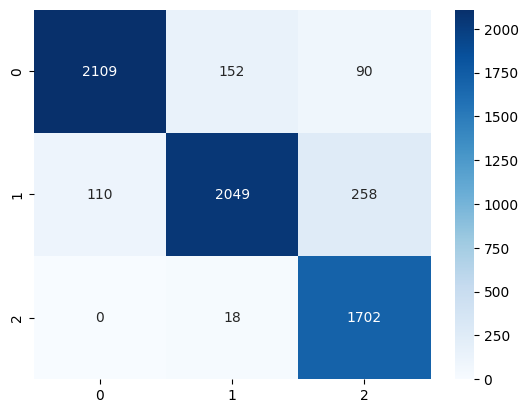

In [36]:
import seaborn as sb
sb.heatmap(cf, annot=True,fmt='', cmap='Blues');

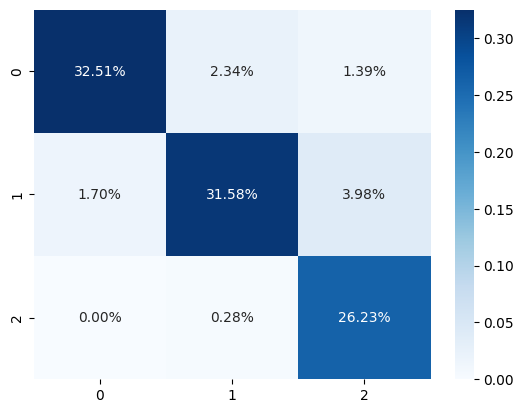

In [37]:
import seaborn as sb
sb.heatmap(cf/np.sum(cf), annot=True,fmt='.2%', cmap='Blues');

In [38]:
del X_test,X_train,X_valid
gc.collect()

12388